In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

### PART 1 : Dataset "covid_vaccine_statewise.csv"

In [37]:
df = pd.read_csv('covid_vaccine_statewise.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [39]:
df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


### Finding the null values of each attribute

In [40]:
df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

#### Finding columns which have more non-null values than a threshold of 30% of the total number of rows in the DataFrame.

Columns having the number of non-null values is greater than 30% of the total number of rows are: 
18-44 Years (Doses Administered), 45-60 Years (Doses Administered), and 60+ Years (Doses Administered)
Male(Individuals Vaccinated), Female(Individuals Vaccinated), and Transgender(Individuals Vaccinated)

In [41]:
print(df.notna().sum() > df.shape[0]*0.3)

Updated On                              True
State                                   True
Total Doses Administered                True
Sessions                                True
 Sites                                  True
First Dose Administered                 True
Second Dose Administered                True
Male (Doses Administered)               True
Female (Doses Administered)             True
Transgender (Doses Administered)        True
 Covaxin (Doses Administered)           True
CoviShield (Doses Administered)         True
Sputnik V (Doses Administered)          True
AEFI                                    True
18-44 Years (Doses Administered)       False
45-60 Years (Doses Administered)       False
60+ Years (Doses Administered)         False
18-44 Years(Individuals Vaccinated)     True
45-60 Years(Individuals Vaccinated)     True
60+ Years(Individuals Vaccinated)       True
Male(Individuals Vaccinated)           False
Female(Individuals Vaccinated)         False
Transgende

#### Delete Male(Individuals Vaccinated), Female(Individuals Vaccinated), Transgender(Individuals Vaccinated) as they 0 non null values

In [42]:
df = df.drop(['Male(Individuals Vaccinated)', 'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)'], axis=1)

#### India not a state. Hence, we'll delete india

In [43]:
print("India present: ",df.State.unique())
print()
df = df[df['State'] != 'India']
print("States: ",df['State'].unique())

India present:  ['India' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']

States:  ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 '

#### Checking datatypes

In [44]:
df.dtypes

Updated On                              object
State                                   object
Total Doses Administered               float64
Sessions                               float64
 Sites                                 float64
First Dose Administered                float64
Second Dose Administered               float64
Male (Doses Administered)              float64
Female (Doses Administered)            float64
Transgender (Doses Administered)       float64
 Covaxin (Doses Administered)          float64
CoviShield (Doses Administered)        float64
Sputnik V (Doses Administered)         float64
AEFI                                   float64
18-44 Years (Doses Administered)       float64
45-60 Years (Doses Administered)       float64
60+ Years (Doses Administered)         float64
18-44 Years(Individuals Vaccinated)    float64
45-60 Years(Individuals Vaccinated)    float64
60+ Years(Individuals Vaccinated)      float64
Total Individuals Vaccinated           float64
dtype: object

In [45]:
df['Updated On'] = pd.to_datetime(df['Updated On'])

#### Q1)  Describe the dataset

In [46]:
df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Total Individuals Vaccinated
count,7.415000e+03,7.415000e+03,7415.000000,7.415000e+03,7.415000e+03,7.415000e+03,7.415000e+03,7415.000000,7.415000e+03,7.415000e+03,2914.000000,5291.000000,1.656000e+03,1.656000e+03,1.656000e+03,3.632000e+03,3.633000e+03,3.633000e+03,5.759000e+03
mean,4.720335e+06,2.462739e+05,1173.123264,3.808916e+06,9.114184e+05,2.302453e+06,2.020113e+06,718.469049,5.368106e+05,4.175775e+06,4961.982498,585.480060,4.508783e+06,3.824424e+06,2.899150e+06,7.166336e+05,1.498468e+06,1.350096e+06,2.336581e+06
std,7.877656e+06,4.724983e+05,1557.088007,6.299814e+06,1.636821e+06,4.090176e+06,3.505041e+06,1492.768922,9.838332e+05,6.931911e+06,13325.990621,801.540814,4.980031e+06,4.084621e+06,3.204826e+06,1.163574e+06,1.853811e+06,1.615079e+06,3.865512e+06
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,0.000000,0.000000,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,7.000000e+00
25%,1.287485e+05,5.755000e+03,67.000000,1.081580e+05,1.235100e+04,5.573950e+04,5.128200e+04,8.000000,0.000000e+00,1.256235e+05,0.000000,106.000000,4.302122e+05,2.283322e+05,1.250870e+05,5.366975e+04,9.120600e+04,5.536300e+04,7.050550e+04
50%,7.517130e+05,3.736200e+04,545.000000,6.219820e+05,1.276590e+05,3.836600e+05,3.291230e+05,111.000000,7.600000e+03,6.917980e+05,0.000000,288.000000,2.929598e+06,2.607937e+06,1.722154e+06,2.801420e+05,7.373880e+05,7.670690e+05,3.720700e+05
75%,6.099970e+06,3.052925e+05,1563.500000,4.985715e+06,1.058346e+06,2.678347e+06,2.509139e+06,776.000000,6.635935e+05,5.486316e+06,2029.500000,719.000000,6.698730e+06,6.256604e+06,4.884511e+06,8.317480e+05,2.355564e+06,2.072824e+06,3.096800e+06
max,5.444772e+07,8.171330e+06,12350.000000,4.593249e+07,1.211255e+07,3.064344e+07,2.378586e+07,18415.000000,6.171089e+06,4.825801e+07,97389.000000,4706.000000,2.658372e+07,1.700704e+07,1.272274e+07,9.213328e+06,9.408647e+06,7.481940e+06,2.478224e+07


#### Q2) Number of persons state wise vaccinated for first dose in India

In [47]:
first_dose = df.groupby('State')['First Dose Administered'].sum()
first_dose

State
Andaman and Nicobar Islands                 1.642585e+07
Andhra Pradesh                              1.232861e+09
Arunachal Pradesh                           4.900498e+07
Assam                                       5.856002e+08
Bihar                                       1.470503e+09
Chandigarh                                  4.470310e+07
Chhattisgarh                                7.960029e+08
Dadra and Nagar Haveli and Daman and Diu    3.359506e+07
Delhi                                       6.243395e+08
Goa                                         7.599137e+07
Gujarat                                     2.131646e+09
Haryana                                     7.557984e+08
Himachal Pradesh                            3.162940e+08
Jammu and Kashmir                           4.101018e+08
Jharkhand                                   6.036737e+08
Karnataka                                   1.873330e+09
Kerala                                      1.193845e+09
Ladakh                   

#### Normalize the 'First Dose Administered' values

In [48]:
normalized_first_dose = (first_dose - first_dose.min()) / (first_dose.max() - first_dose.min())

# Convert the resulting series into a DataFrame and reset the index
normalized_first_dose = normalized_first_dose.reset_index()

#### Normalized First Dose Administered by State
- Utter Pradesh and Maharahstra have the highest first doses administrated.
- Rajasthan and Gujarat have the 3rd and 4th highest first doses administrated.
- The lowest two First Dose Administered states are islands.

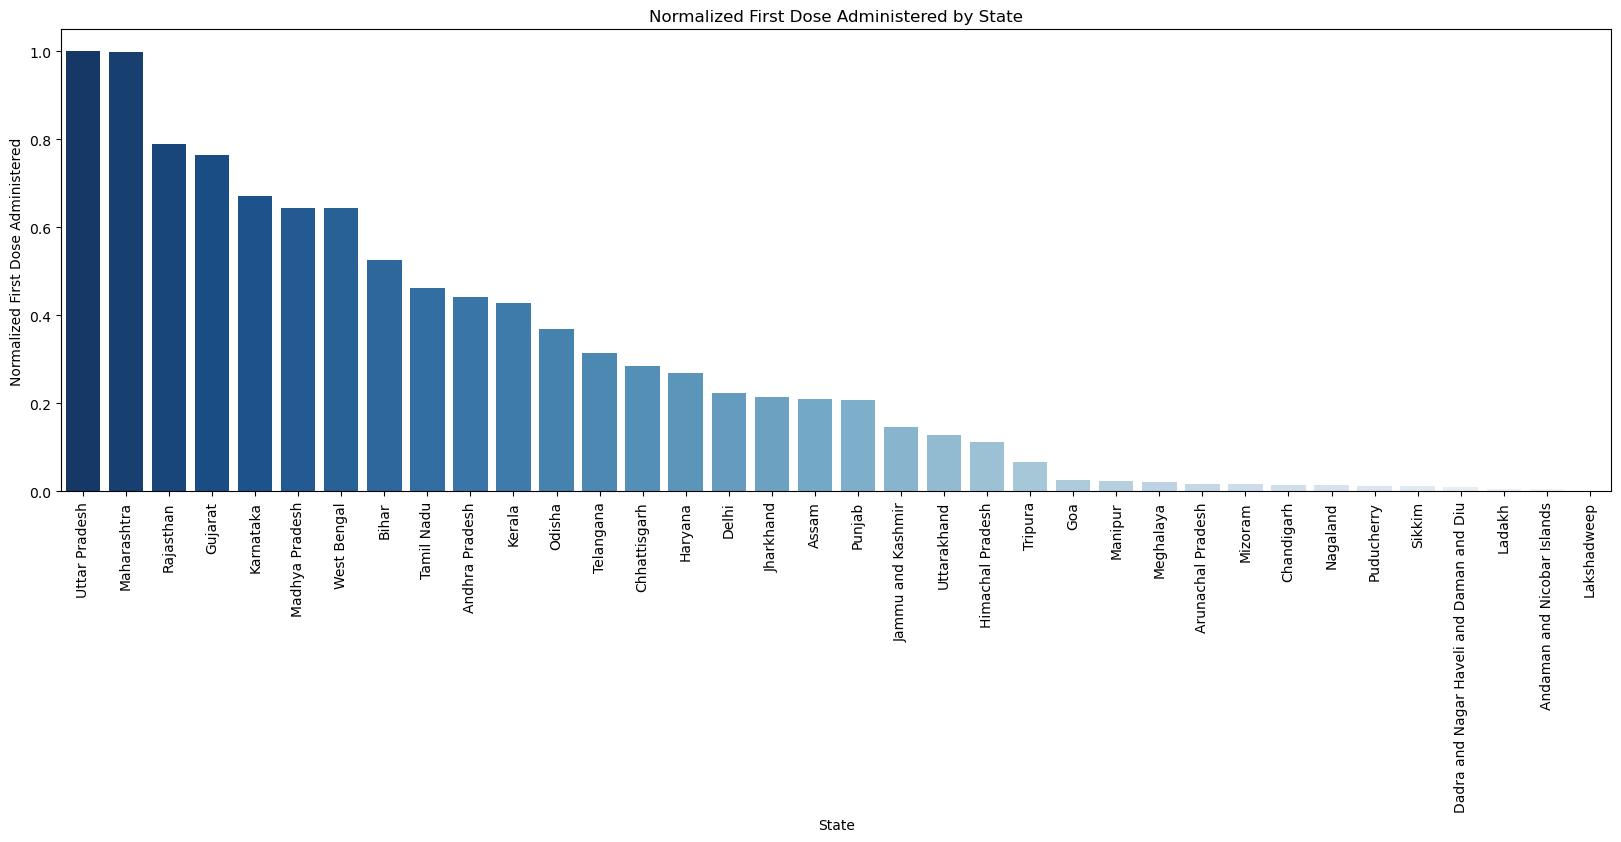

In [49]:
plt.figure(figsize=(20, 6))
sorted_data = normalized_first_dose.sort_values('First Dose Administered', ascending=False)

num_states = len(sorted_data)
color_palette = sb.color_palette('Blues', n_colors=num_states)
reversed_palette = color_palette[::-1]

sb.barplot(x='State', y='First Dose Administered', data=sorted_data, palette=reversed_palette)

plt.title('Normalized First Dose Administered by State')
plt.xlabel('State')
plt.ylabel('Normalized First Dose Administered')

plt.xticks(rotation=90)
plt.show()

#### Q3)  The number of persons state-wise vaccinated for the second dose in India:

In [50]:
second_dose = df.groupby('State')['Second Dose Administered'].sum()
second_dose

State
Andaman and Nicobar Islands                   4118554.0
Andhra Pradesh                              358817595.0
Arunachal Pradesh                            11932317.0
Assam                                       130788792.0
Bihar                                       270790571.0
Chandigarh                                   11593735.0
Chhattisgarh                                172120400.0
Dadra and Nagar Haveli and Daman and Diu      4594416.0
Delhi                                       188218946.0
Goa                                          16198174.0
Gujarat                                     600418376.0
Haryana                                     158656058.0
Himachal Pradesh                             73838582.0
Jammu and Kashmir                            85951651.0
Jharkhand                                   122121060.0
Karnataka                                   427187178.0
Kerala                                      364048753.0
Ladakh                                    

#### Normalized Second Dose Administered by State
- Maharahstra has the highest first doses administrated.
- Gujarat and West Bengal has the 3rd highest first doses administrated.

In [51]:
normalized_second_dose = (second_dose - second_dose.min()) / (second_dose.max() - second_dose.min())

# Convert the resulting series into a DataFrame and reset the index
normalized_second_dose = normalized_second_dose.reset_index()

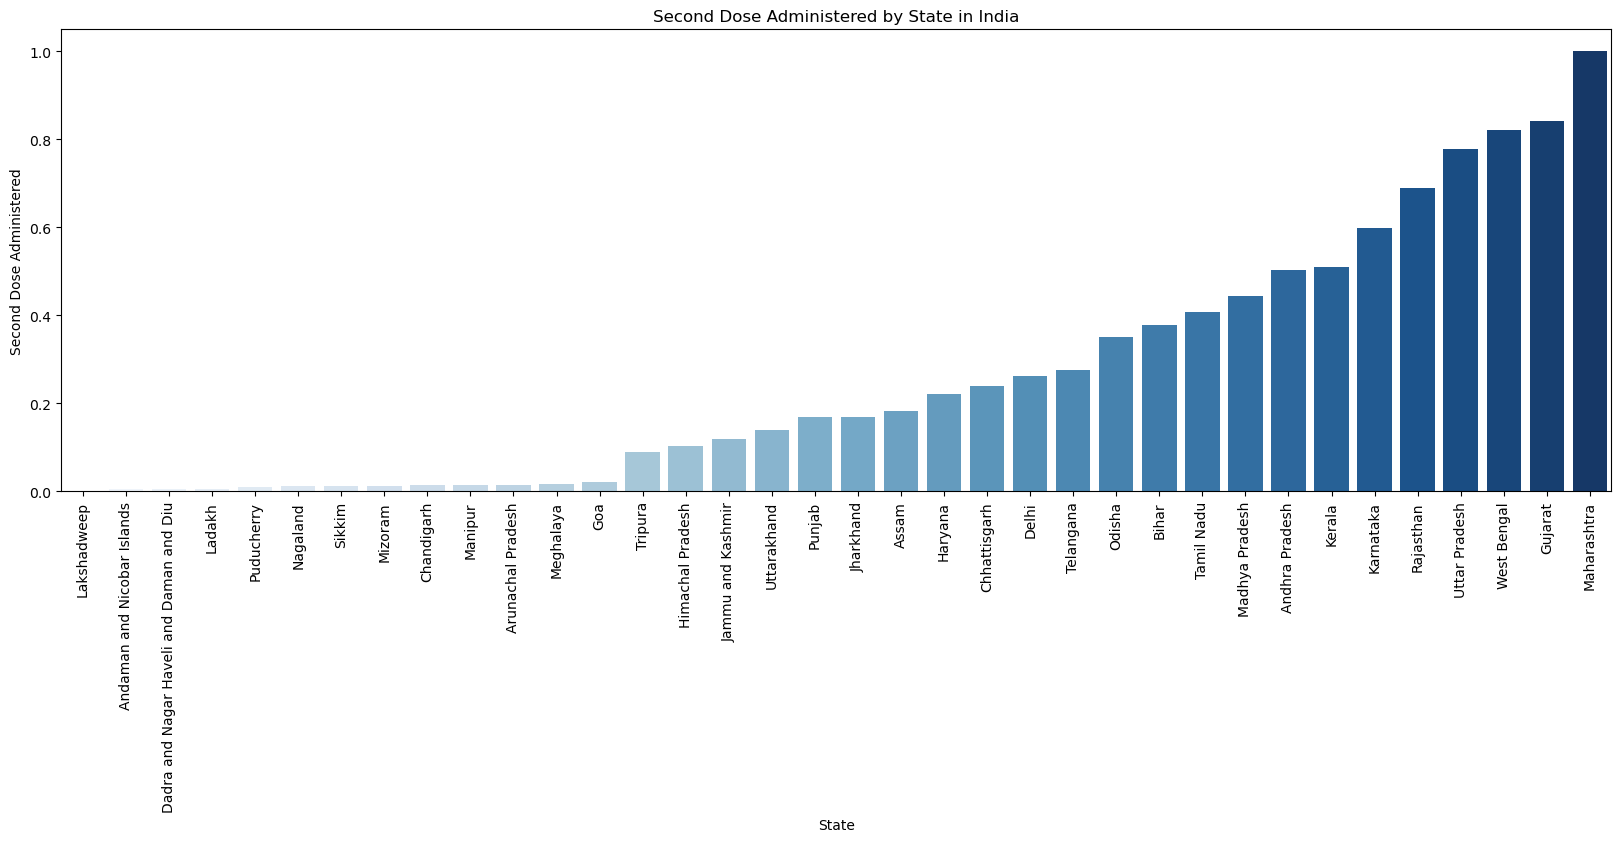

In [52]:
plt.figure(figsize=(20, 6))

sorted_data = normalized_second_dose.sort_values('Second Dose Administered', ascending=True)

sb.barplot(x='State', y='Second Dose Administered',data=sorted_data, palette=color_palette)
plt.title('Second Dose Administered by State in India')
plt.xlabel('State')
plt.ylabel('Second Dose Administered')

plt.xticks(rotation=90)
plt.show()

#### Q4 Number of males and Females vaccinated:
- The approximately 6.53% difference between the number of males and females vaccinated suggests a slight gender disparity in vaccination rates.

In [53]:
females_vaccinated = df['Female (Doses Administered)'].sum()
males_vaccinated = df['Male (Doses Administered)'].sum()

total = females_vaccinated + males_vaccinated
(males_vaccinated/ (total) - females_vaccinated/ (total))*100

6.531760165981626

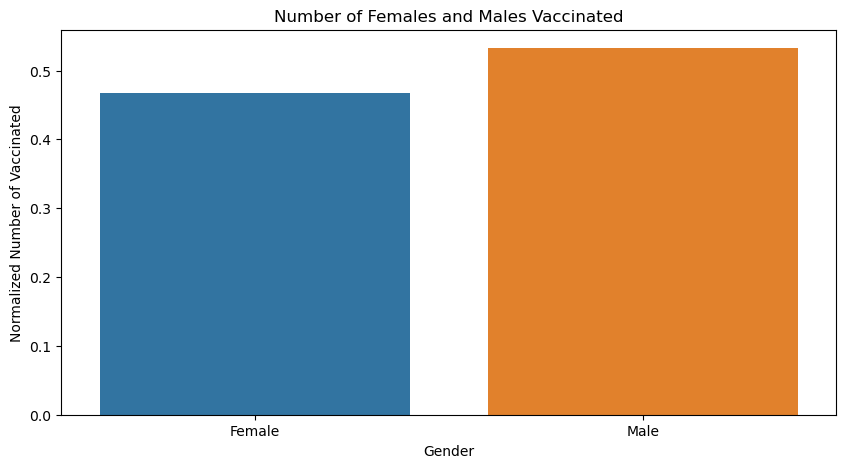

In [54]:
# Normalize the data
total_vaccinated = females_vaccinated + males_vaccinated
normalized_females = females_vaccinated / total_vaccinated
normalized_males = males_vaccinated / total_vaccinated

# created new df called data
data = {'Gender': ['Female', 'Male'], 'Vaccinated': [normalized_females, normalized_males]}
df_gender = pd.DataFrame(data)

# Plot the bar graph
plt.figure(figsize=(10, 5))
sb.barplot(x='Gender', y='Vaccinated', data=df_gender)
plt.title('Number of Females and Males Vaccinated')
plt.xlabel('Gender')
plt.ylabel('Normalized Number of Vaccinated')

plt.show()

### PART 2

In [55]:
df2= pd.read_csv("covid_19_india.csv").reset_index(drop =True)
df2 = df2.drop(["Sno"],axis=1)
df2.head(3)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      18110 non-null  object
 1   Time                      18110 non-null  object
 2   State/UnionTerritory      18110 non-null  object
 3   ConfirmedIndianNational   18110 non-null  object
 4   ConfirmedForeignNational  18110 non-null  object
 5   Cured                     18110 non-null  int64 
 6   Deaths                    18110 non-null  int64 
 7   Confirmed                 18110 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


In [57]:
df2.drop(['ConfirmedForeignNational','ConfirmedIndianNational'],axis=1,inplace = True)

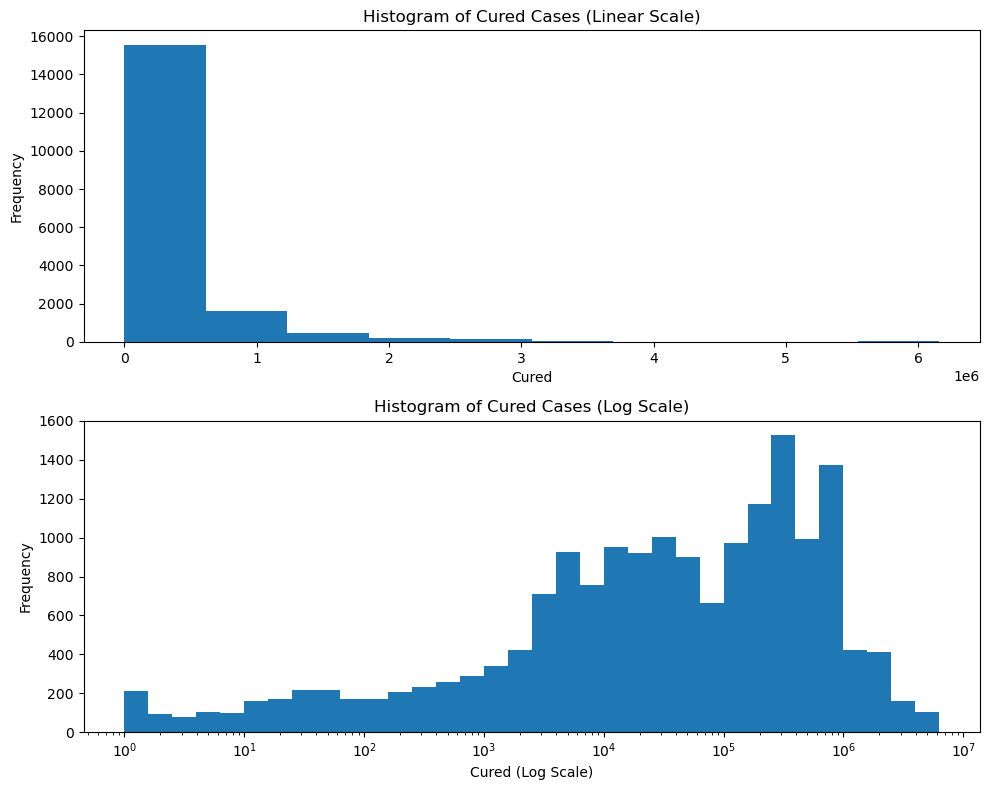

In [71]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].hist(data=df2, x='Cured', bins=10)
axes[0].set_xlabel('Cured')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Cured Cases (Linear Scale)')

bins = 10 ** np.arange(0, np.log10(df2.Cured).max() + 0.2, 0.2)
axes[1].hist(data=df2, x='Cured', bins=bins)
axes[1].set_xscale('log')
axes[1].set_xlabel('Cured (Log Scale)')
axes[1].set_ylabel('Frequency')
#axes[1].set_yscale('log')
axes[1].set_title('Histogram of Cured Cases (Log Scale)')

plt.tight_layout()
plt.show()


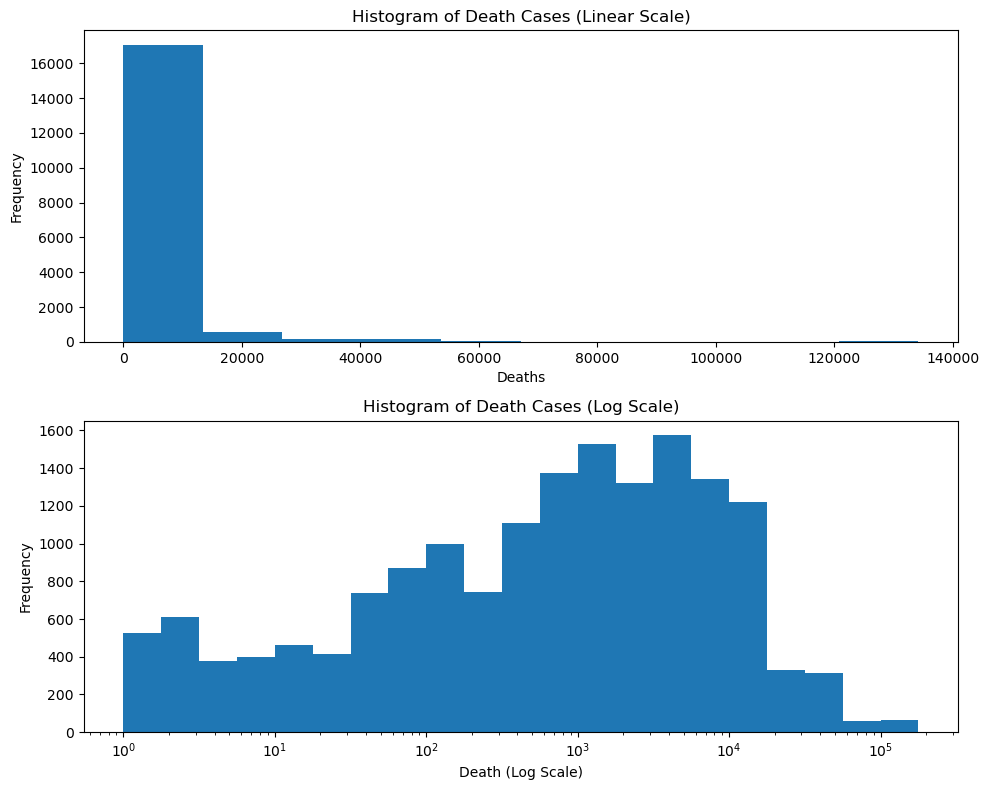

In [74]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].hist(data=df2, x='Deaths', bins=10)
axes[0].set_xlabel('Deaths')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Death Cases (Linear Scale)')

bins = 10 ** np.arange(0, np.log10(df2.Deaths).max() + 0.25, 0.25)
axes[1].hist(data=df2, x='Deaths', bins=bins)
axes[1].set_xscale('log')
axes[1].set_xlabel('Death (Log Scale)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Death Cases (Log Scale)')

plt.tight_layout()
plt.show()


- Both the plots display a left skewed histogram which means that the frequency of cured and deaths is quite high.
- Both the plots have the similar trend or pattern.

#### Preparing my data for the Time Series Modelling (DATA PREPROCESSING)

In [60]:
df3 = df2.copy()

df3['Date'] = pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)
# Sort the dataframe by the index (date)
df3.sort_index(inplace=True)

# Resample the data to monthly frequency
df3_monthly = df3['Cured'].resample('M').sum()

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df3_normalized = scaler.fit_transform(df3_monthly.values.reshape(-1, 1))

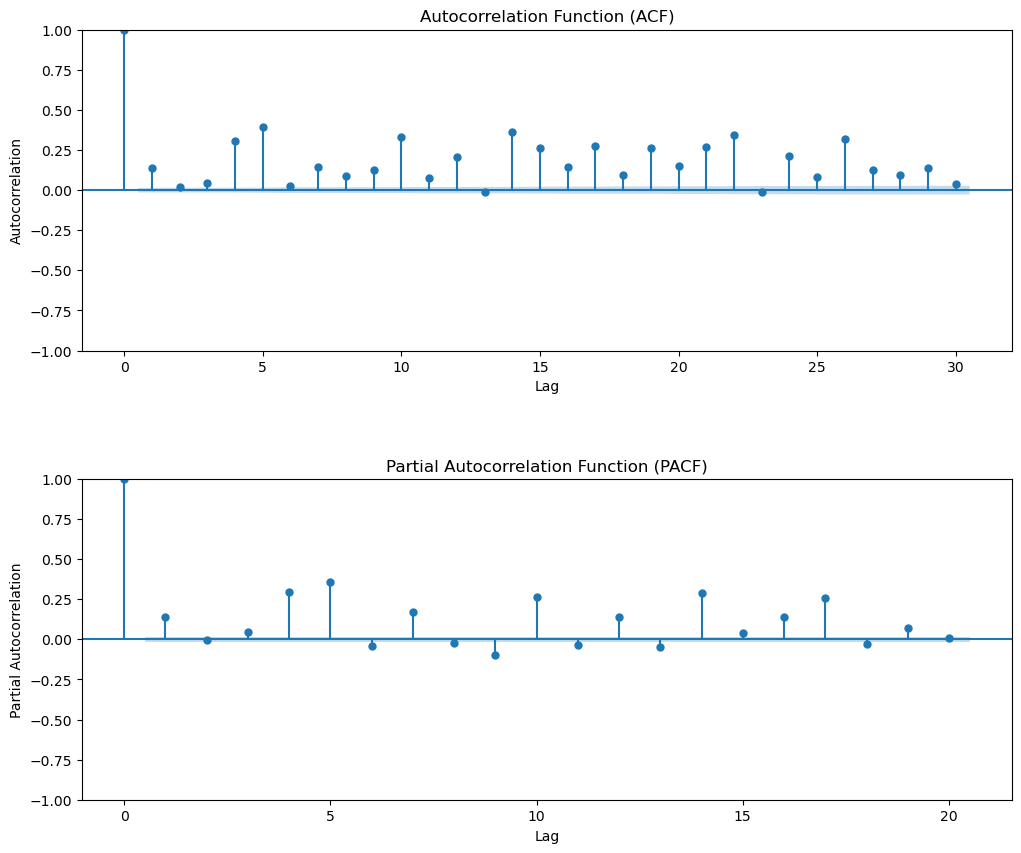

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Autocorrelation Function (ACF)
plot_acf(df3['Cured'], lags=30, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Function (PACF)
plot_pacf(df3['Cured'], lags=20, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()

When the lag 0 autocorrelation is significantly high in both the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots, it indicates a strong correlation between the current observation and its immediate preceding observation.

This suggests that the number of Cured patients in the current time period is strongly influenced by the number of confirmed cases in the previous time period.

In [62]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the range of values for p, d, and q
p_values = range(0, 3)  # Replace with your desired range
d_values = range(0, 3)  # Replace with your desired range
q_values = range(0, 3)  # Replace with your desired range

# Create a list to store the results
results = []

# Perform grid search
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Fit ARIMA model with the current p, d, q values
        model = ARIMA(df3_normalized, order=(p, d, q))
        model_fit = model.fit()

        # Append the AIC value and the corresponding p, d, q values to the results list
        results.append((model_fit.aic, p, d, q))
    except:
        continue

# Sort the results by AIC in ascending order
results.sort()

# Get the best AIC value and the corresponding p, d, q values
best_aic, best_p, best_d, best_q = results[0]

# Print the optimal values
print(f"Best AIC: {best_aic}")
print(f"Best p: {best_p}")
print(f"Best d: {best_d}")
print(f"Best q: {best_q}")

Best AIC: -12.930042014592836
Best p: 1
Best d: 0
Best q: 2


#### ARIMA MODEL

In [75]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler


# Fit the ARIMA model
model = ARIMA(df3_normalized, order=(1, 0, 2))
model_fit = model.fit()

# Forecast the next 4 months
forecast = model_fit.forecast(steps=4)

# Inverse transform the forecasted values to the original scale
forecast = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()

# Create date range for the forecasted period
last_date = df3_monthly.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=4, freq='M')


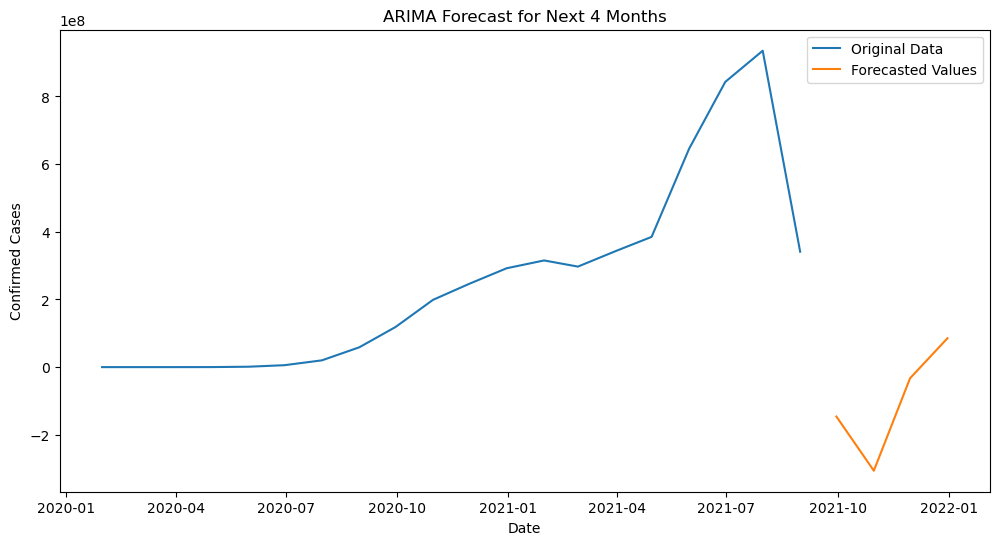

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df3_monthly.index, df3_monthly.values, label='Original Data')
plt.plot(forecast_dates, forecast, label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('ARIMA Forecast for Next 4 Months')
plt.legend()
plt.show()

#### Model Evaluation for ARIMA Model

In [65]:
# Get the actual values for the evaluation period
actual_values = df3_monthly[-4:].values

# Calculate the metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_values, forecast)
r2 = r2_score(actual_values, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 791140265.2061458
Mean Squared Error (MSE): 7.374849450751023e+17
Root Mean Squared Error (RMSE): 858769436.5049925
Mean Absolute Percentage Error (MAPE): 1.0936231315515619
R-squared (R2) Score: -13.23045134565778


The high errors and negative R2 score indicate that the model's predictions deviate significantly from the actual values and fail to explain the variance in the data. the model's performance based on these metrics is not satisfactory. The MAE, MSE, and RMSE values are very high, indicating a significant deviation between the predicted and actual values. The MAPE value is relatively low, suggesting that the percentage deviation is more reasonable.

In [66]:
import numpy as np
import pandas as pd


# Define the range of p, d, q values
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)

# Create all possible combinations of p, d, q values
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Define the function to fit and evaluate SARIMAX models
def fit_sarimax(order):
    try:
        model = SARIMAX(df3_normalized, order=order)
        model_fit = model.fit(disp=False)
        mse = mean_squared_error(df3_normalized, model_fit.fittedvalues)
        return order, mse
    except:
        return order, np.inf

# Parallelize the grid search process
results = Parallel(n_jobs=-1)(delayed(fit_sarimax)(order) for order in param_combinations)

# Find the best model based on the lowest MSE
best_order,mse = min(results, key=lambda x: x[1])

# Print the best model order and MSE
print('Best Order:', best_order)

Best Order: (1, 0, 1)


#### SARIMAX MODEL

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(df3_normalized, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast the next 4 months
forecast = model_fit.forecast(steps=4)

# Inverse transform the forecasted values to the original scale
forecast = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()

# Create date range for the forecasted period
last_date = df3_monthly.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=4, freq='M')

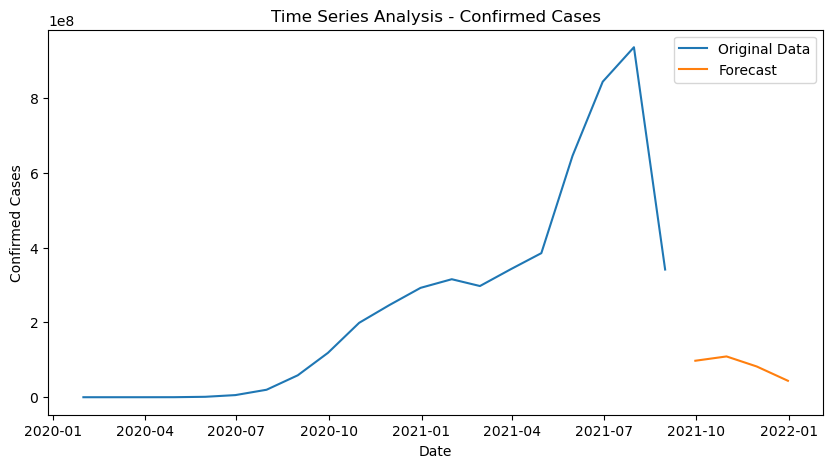

In [68]:
# Plot the original data and the forecasted values for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(df3_monthly.index, df3_monthly.values, label='Original Data')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Time Series Analysis - Confirmed Cases')
plt.legend()
plt.show()


#### Model Evaluation for SARIMAX Model

In [69]:
actual_values = df3_monthly[-4:].values

# Calculate the metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_values, forecast)
r2 = r2_score(actual_values, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 608045567.6980269
Mean Squared Error (MSE): 4.137706504420334e+17
Root Mean Squared Error (RMSE): 643250068.3575816
Mean Absolute Percentage Error (MAPE): 0.8757581665013704
R-squared (R2) Score: -6.984085842968504


### Comparing the model evaluation metrics


The SARIMAX model outperforms the ARIMA model in terms of all evaluation metrics. It has lower values for MAE, MSE, RMSE, MAPE, and a less negative R-squared score, indicating better accuracy and performance in predicting the target variable.


## This is the end of the MiniProject !
**NOTE - We can further create other types of models to get better performance.**